# TP4 : Éléments finis en 1D

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, csr_matrix
from scipy.sparse.linalg import spsolve

> **Question 1.** Supposons $u$ solution de (BVM). On choisit $V = H^1(I)$ (condition de Neumann). Multiplions l'EDP du volume par $v \in H^1(I)$ et intégrons sur $I$. On obtient 
> $$ \int_0^1 -\partial_x^2u\bar{v} +\mu^2u\bar{v}\, dx = \int_0^1 f\bar{v} \, dx.$$
> En utilisant la formule de Green (ici l'intégration par parties) : 
> $$ \left[-\partial_xu\bar{v}\right]_0^1 + \int_0^1 \partial_x u\partial_x \bar{v} + \mu^2 u\bar{v} \,dx  = \int_0^1 f\bar{v} \, dx.$$
> $$ \Leftrightarrow \int_0^1 \partial_x u\partial_x \bar{v} + \mu^2 u\bar{v} \,dx  = \int_0^1 f\bar{v} \, dx.$$
> $$ \Leftrightarrow a(u,v) = l(v).$$ 

> **Question2.** Voir méthode de Galerkine. 

> **Question 3.**

In [2]:
def Kh(N): #où N=1/h
    mat=-np.eye(N+1,k=-1)-np.eye(N+1,k=1)+2*np.eye(N+1)
    mat[0,0]=1 #on doit changer les deux valeurs car sinon elles sont égales à deux
    mat[N,N]=1
    return N*mat

def Kh_sparse(N): #afin de créer une matrice creuse 
    mat=csr_matrix(diags([-1,2,-1],[-1,0,1], shape=(N+1,N+1)))
    mat[0,0]=1
    mat[N,N]=1
    return N*mat

def Mh(N) :
    h=1/N
    mat=np.eye(N+1,k=-1)+np.eye(N+1,k=1)+4*np.eye(N+1)
    mat[0,0]=2
    mat[N,N]=2
    return h/6*mat 

def Mh_sparse(N) : 
    h=1/N
    mat=csr_matrix(diags([1,4,1],[-1,0,1], shape=(N+1,N+1)))
    mat[0,0]=2
    mat[N,N]=2
    return h/6*mat

def f(x) : #on prend p=3 
    return np.cos(3*np.pi*x)

def maillage(N):
    return np.linspace(0,1,N+1)

def Fh(N) : 
    return Mh(N) @ f(maillage(N))

def Fh_sparse(N) : 
    return Mh_sparse(N) @ f(maillage(N))

print (Kh(10))
print (Mh(10))

[[ 10. -10.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [-10.  20. -10.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. -10.  20. -10.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. -10.  20. -10.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. -10.  20. -10.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. -10.  20. -10.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. -10.  20. -10.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. -10.  20. -10.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. -10.  20. -10.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0. -10.  20. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. -10.  10.]]
[[0.03333333 0.01666667 0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.01666667 0.06666667 0.01666667 0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.01666667 0.06666667 0.01666667 0.         0.
  0.         0.         0.         0.         0.        ]
 [0.   

> **Question 4.**

In [5]:
def Ah_sparse(N) : 
    return Kh_sparse(N)+1*1*Mh_sparse(N)

def Uh(N) : 
    return np.linalg.solve(Ah(N),Fh(N))

def Uh_sparse(N) : 
    return spsolve(Ah_sparse(N), Fh_sparse(N))

N_values=np.linspace(10,1000,10)
for N in N_values : 
    N=int(N)
    print("Pour N = {} : \n".format(N))
    print(Uh(N))
    print("\n")
    print(Uh_sparse(N))
    print("\n")

Pour N = 10 : 

[ 1.03545939e-02  6.08627759e-03 -3.19974548e-03 -9.84780400e-03
 -8.37704243e-03  8.59444348e-17  8.37704243e-03  9.84780400e-03
  3.19974548e-03 -6.08627759e-03 -1.03545939e-02]


[ 1.03545939e-02  6.08627759e-03 -3.19974548e-03 -9.84780400e-03
 -8.37704243e-03  1.11022302e-16  8.37704243e-03  9.84780400e-03
  3.19974548e-03 -6.08627759e-03 -1.03545939e-02]


Pour N = 120 : 

[ 1.11269225e-02  1.10926219e-02  1.09899316e-02  1.08194848e-02
  1.05823322e-02  1.02799360e-02  9.91416057e-03  9.48726105e-03
  9.00186942e-03  8.46097827e-03  7.86792237e-03  7.22635812e-03
  6.54024097e-03  5.81380105e-03  5.05151712e-03  4.25808891e-03
  3.43840816e-03  2.59752848e-03  1.74063417e-03  8.73008280e-04
  9.90066864e-16 -8.73008280e-04 -1.74063417e-03 -2.59752848e-03
 -3.43840816e-03 -4.25808891e-03 -5.05151712e-03 -5.81380105e-03
 -6.54024097e-03 -7.22635812e-03 -7.86792237e-03 -8.46097827e-03
 -9.00186942e-03 -9.48726105e-03 -9.91416057e-03 -1.02799360e-02
 -1.05823322e-02 -

> **Question 5.** 

Étant donné un élément $v_h \in V_h(\Omega)$, on note $V = (v_h(s_j^h))_{j=0...N_v}$ le vecteur des valeurs nodales, on a : 
$\newline$
$\| v_h \|_{L^2(\Omega)}^2 = V^TMV$ et $\| \nabla v_h \|_{L^2(\Omega)}^2 = V^TKV$
où $M$ et $K$ sont respectivement la matrice de masse et de ridigité. 

En effet, 
$\|v^h\|_{L^2} = \sqrt{\int_{\Omega} |v(x)|^2 dx}$

$\Longleftrightarrow$
$\|v^h\|_{L^2} =\sqrt{\int_{\Omega} | \sum_{i=1}^{N_v} \phi_i(x) v_i^h|^2 dx}$

$\Longleftrightarrow$
$\|v^h\|_{L^2} =\sqrt{\int_{\Omega}  \sum_{i=1}^{N_v} \phi_i(x) v_i^h \sum_{j=1}^{N_v} \phi_j(x) \bar{v_j^h} dx}$


$\Longleftrightarrow$
$\|v^h\|_{L^2} =\sqrt{\sum_{i=1}^{n} \sum_{j=1}^{n} v_i^h \bar{v_j^h} M_{ij}}$, par définition de la matrice de masse et par linéarité de l'intégrale. 

$\Longleftrightarrow$
$\|v^h\|_{L^2} =\sqrt{V^T \cdot M \cdot V}$


De même, 
$\|\nabla v^h\|_{L^2} = \sqrt{\int_{\Omega} |\nabla v(x)|^2 dx}$

$\Longleftrightarrow$
$\|\nabla v^h\|_{L^2} =\sqrt{\int_{\Omega} | \sum_{i=1}^{N_v} \nabla \phi_i(x) v_i^h|^2 dx}$

$\Longleftrightarrow$
$\|v^h\|_{L^2} =\sqrt{\int_{\Omega}  \sum_{i=1}^{N_v} \nabla \phi_i(x) v_i^h \sum_{j=1}^{N_v} \nabla \phi_j(x) \bar{v_j^h} dx}$

$\Longleftrightarrow$
$\|v^h\|_{L^2} =\sqrt{\sum_{i=1}^{n} \sum_{j=1}^{n} v_i^h \bar{v_j^h} K_{ij}}$, par définition de la matrice de rigidité et par linéarité de l'intégrale. 


$\Longleftrightarrow$
$\|v^h\|_{L^2} =\sqrt{V^T \cdot K \cdot V}$

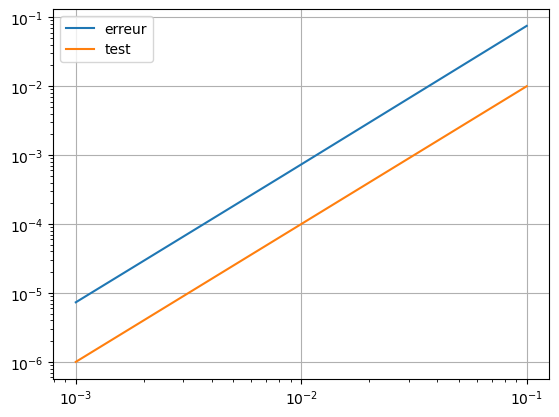

In [8]:
def u(x):
    return 1/(3*3*np.pi*np.pi+1*1)*np.cos(np.pi*3*x)

def vect_val_nodales(v,N):
    points=np.linspace(0,1,N+1)#les x_j^h
    return v(points)  

def norme_ecart(u,N):
    return (np.transpose(vect_val_nodales(u,N)-Uh(N)))@Mh(N)@(vect_val_nodales(u,N)-Uh(N))


def norme_uh(N):
    return (np.transpose(Uh(N)))@Mh(N)@Uh(N) 


def erreur(u,N):
    return np.sqrt(norme_ecart(u,N)/norme_uh(N))


N_values=np.linspace(10,1000,10)
h_values=1/N_values
ord=[]

for N in N_values : 
    N=int(N)
    ord.append(erreur(u,N))
#Plus condensée  : ord = [erreur(u,N) for int(N) in N_values]

plt.loglog(h_values,ord,label='erreur')
plt.loglog(h_values, h_values**2, label='test')
plt.grid()
plt.legend()
plt.show()

> **Question 6.** 

In [9]:
def Ah_PseudoElim(N): # Matrice Ah pseudo-éliminée pour prendre en compte les conditions de Dirichlet
    Adot = Ah(N)
    Adot[0,:] = np.zeros(N+1)
    Adot[:,0] = np.zeros(N+1)
    Adot[N,:] = np.zeros(N+1)
    Adot[:,N] = np.zeros(N+1)
    Adot[0,0] = 1
    Adot[N,N] = 1
    return Adot

print(Ah_PseudoElim(3))

def Fh_PseudoElim(N) : 
    Fhdot = Fh(N)
    Fhdot[0] = 0
    Fhdot[N] = 0
    return Fhdot

def Uh_Dirichlet(N): # Résolution du système correspondant aux conditions de Dirichlet
    return spsolve(Ah_PseudoElim(N),Fh_PseudoElim(N))

[[ 1.          0.          0.          0.        ]
 [ 0.          6.22222222 -2.94444444  0.        ]
 [ 0.         -2.94444444  6.22222222  0.        ]
 [ 0.          0.          0.          1.        ]]
